In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('1995_96 - 2020 Premier league standings.csv')

In [6]:
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020


In [7]:
df['GD'] = df['GF'] - df['GA'] #create Goal Difference column

In [8]:
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996,29
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996,36
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996,17
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020,-13
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020,-26
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020,-25
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020,-28


In [9]:
y = df.Rk
x = df.GD.values.reshape(-1,1)

In [10]:
print(x.shape, y.shape)

(500, 1) (500,)


In [11]:
model = LinearRegression().fit(x,y)

In [14]:
r_sq = model.score(x,y) #find r-sqared value

#finding variables for regression line
intercept = model.intercept_
slope = model.coef_

In [15]:
print(r_sq)

0.8384102509297338


In [16]:
yhat = intercept + slope*x #regression line formula

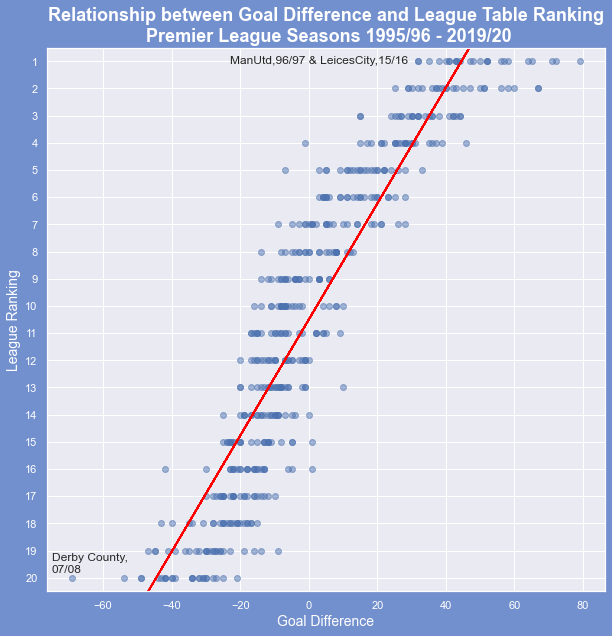

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#728FCE')

plt.scatter(x,y,alpha=0.5) #scatter plot

plt.title('Relationship between Goal Difference and League Table Ranking\n Premier League Seasons 1995/96 - 2019/20',\
          ha='center', fontsize=18, fontname='Arial', weight='bold', color='white')
plt.xlabel('Goal Difference', fontsize=14, color='white')
plt.ylabel('League Ranking', fontsize=14, color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.plot(x,yhat,c='red') #plot regression line

plt.ylim(.5,20.5) #setting regression line limit
plt.yticks(range(1,21)) #set y-axis to integers only
plt.gca().invert_yaxis() #invert y-axis to display rank 1-20

#On graph desrciption about teams
ax.annotate(xy=(-23,1.10), text='ManUtd,96/97 & LeicesCity,15/16')
ax.annotate(xy=(-75,19.8),text='Derby County,\n07/08')

plt.savefig('premrankgd_reg.png',dpi=300,bbox_inches = 'tight',facecolor='#728FCE')

In [62]:
df.sort_values(by=['GD'], ascending=True).head(30)

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
259,20,Derby County,38,1,8,29,20,89,11,32432,Kenny Miller - 4,Stephen Bywater,2008,-69
479,20,Huddersfield,38,3,7,28,22,76,16,23203,Aaron Mooy Mathias Jørgensen... - 3,Jonas Lössl,2019,-54
499,20,Norwich City,38,5,6,27,26,75,21,19913,Teemu Pukki - 11,Tim Krul,2020,-49
419,20,Aston Villa,38,3,8,27,27,76,17,33690,Jordan Ayew - 7,Brad Guzan,2016,-49
478,19,Fulham,38,7,5,26,34,81,26,24371,Aleksandar Mitrović - 11,Sergio Rico,2019,-47
378,19,Fulham,38,9,5,24,40,85,32,24977,Steve Sidwell - 7,David Stockdale,2014,-45
58,19,Barnsley,38,10,5,23,37,82,35,18428,Neil Redfearn - 10,Tony Bullock,1998,-45
159,20,Sunderland,38,4,7,27,21,65,19,39698,Kevin Phillips - 6,Thomas Sørensen,2003,-44
437,18,Hull City,38,9,7,22,37,80,34,20761,Robert Snodgrass - 7,Eldin Jakupović,2017,-43
219,20,Sunderland,38,3,6,29,26,69,15,33904,Liam Lawrence Tommy Miller... - 3,Kelvin Davis,2006,-43
